In [ ]:
# Importing key data exploration and visualisation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data
df = pd.read_csv('Salary_Data.csv')

In [22]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [70]:
print(df)

       Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...

In [ ]:
print(df.to_string())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [19]:
df.nunique()

,0
Age,41
Gender,3
Education Level,7
Job Title,193
Years of Experience,37
Salary,444


In [68]:
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
std_dev_salary = df['Salary'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Mean Salary Rounded: {mean_salary_rounded}")
print(f"Median Salary: {median_salary}")
print(f"Salary Standard Deviation: {std_dev_salary}")

Mean Salary: 115326.96477086132
Mean Salary Rounded: 115326.96
Median Salary: 115000.0
Salary Standard Deviation: 52786.183910682936


In [74]:
# Round the mean salary to 2 decimal places
mean_salary_rounded = round(mean_salary, 2)

In [21]:
# Filter for data analysts with a bachelor's degrees
filtered_df = df[(df["Job Title"] == "Data Analyst") & (df["Education Level"] == "Bachelor's")]

# Calculate the median salary for the filtered group
median_salary_data_analyst = filtered_df["Salary"].median()

print(f"Median Salary for Data Analysts with a Bachelor's Degree: {median_salary_data_analyst}")

Median Salary for Data Analysts with a Bachelor's Degree: 120000.0


In [81]:
# Count occurrences of each education level
education_counts = df['Education Level'].value_counts()
print(education_counts)

Education Level
Bachelor's degree    3023
Master's degree      1861
PhD                  1369
High School           448
Name: count, dtype: int64


In [82]:
print(education_counts.values)

[3023 1861 1369  448]


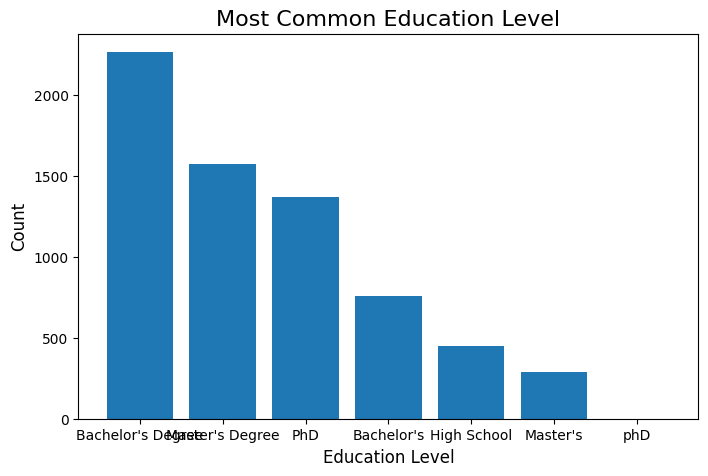

In [ ]:
# Count occurrences of each education level
education_counts = df['Education Level'].value_counts()

# Create a bar chart for education levels
plt.figure(figsize=(8, 5))
plt.bar(education_counts.index, education_counts.values)

plt.title('Most Common Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

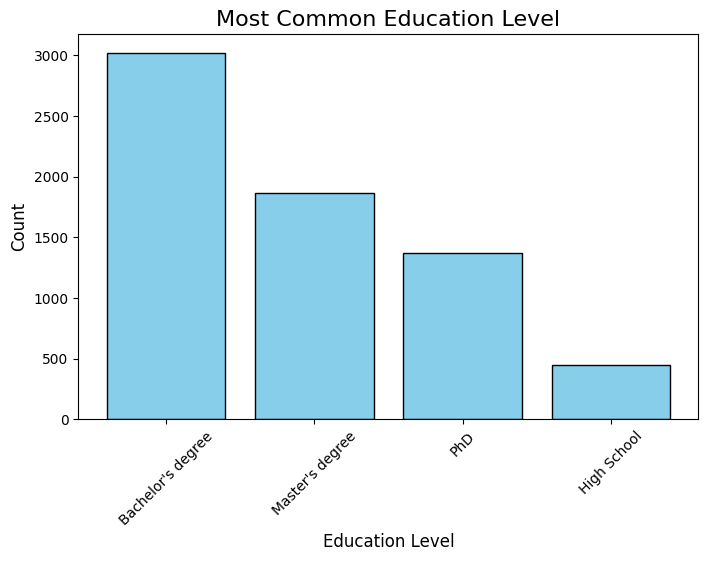

In [ ]:
# Define a mapping dictionary to standardize Education Levels
# First value is the valiue that appears in the dataset, 2nd value is what you want it to be named.
education_mapping = {
    "Bachelor's": "Bachelor's degree",
    "Bachelor's Degree": "Bachelor's degree",
    "Master's Degree" : "Master's degree",
    "Master's degree" : "Master's degree",
    "Master's": "Master's degree",
    'PhD': 'PhD',
    'phD': 'PhD',
}

# Apply the mapping to standardize the Education Level column
df['Education Level'] = df['Education Level'].replace(education_mapping)

# Count occurrences of each education level
education_counts = df['Education Level'].value_counts()

# Create a bar chart for education levels
plt.figure(figsize=(8, 5))
plt.bar(education_counts.index, education_counts.values, color='skyblue', edgecolor='black')

plt.title('Most Common Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.show()

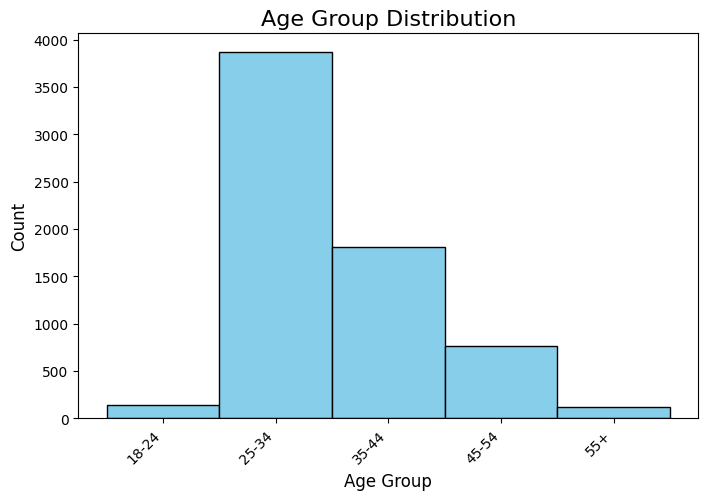

In [ ]:
# Define age groups using pd.cut()
bins = [18, 24, 34, 44, 54, 100]  # Age group ranges
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of each age group
age_group_counts = df['Age Group'].value_counts()

# Sort the age groups in ascending order of their age range
age_group_counts = age_group_counts.sort_index()

# Plot the histogram for age groups without gaps between bars
plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue', edgecolor='black', width=1.0)

plt.title('Age Group Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.show()

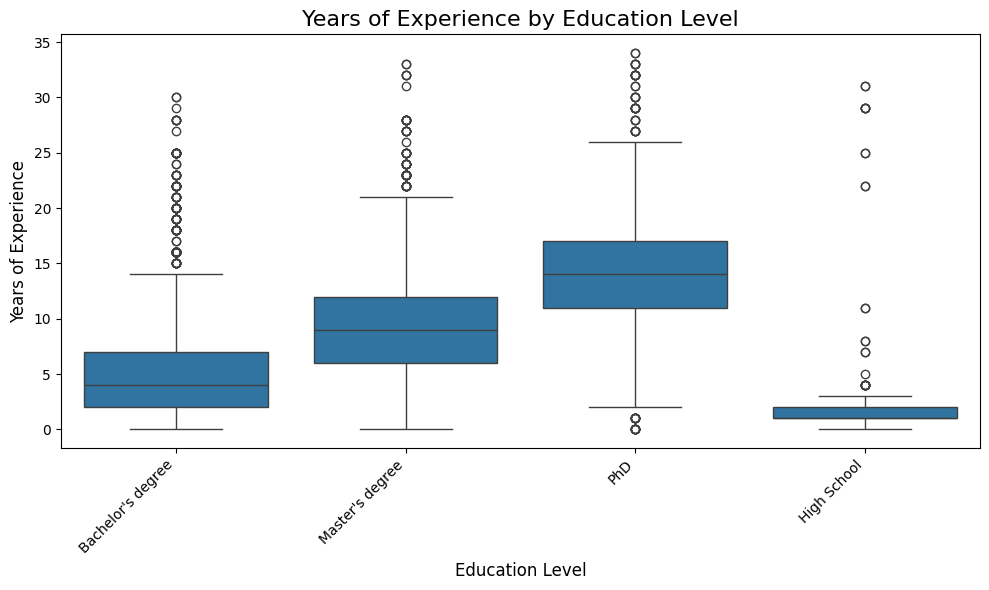

In [ ]:
df['Education Level'] = df['Education Level'].replace(education_mapping)

# Create a box plot for Years of Experience by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Years of Experience', data=df)

plt.title('Years of Experience by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Years of Experience', fontsize=12)

plt.xticks(rotation=45)

plt.show()

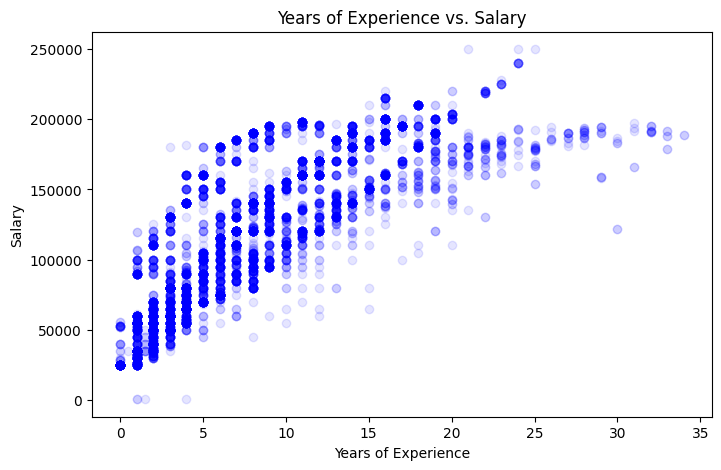

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Years of Experience'], df['Salary'], color='blue', alpha=0.1)

plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

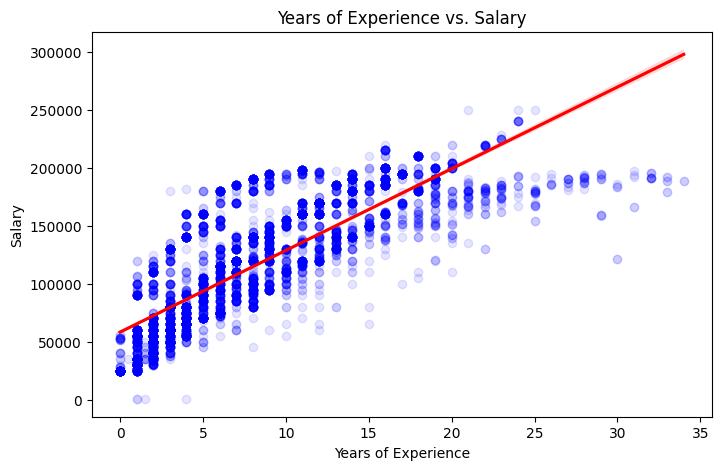

In [ ]:

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x='Years of Experience', y='Salary', data=df, scatter_kws={'color': 'blue', 'alpha': 0.1}, line_kws={'color': 'red'})

plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()
